# Eficiência do ligante (*Ligand efficiency*)

A busca por derivados com maior potência é parte fundamental no processo de desenvolvimento de um composto líder (*lead optimization*). Em geral, aumentar a potência significa adicionar grupos funcionais que interajam favoravelmente com o alvo macromolecular. Porém, esse processo de aumentar o **tamanho molecular**, se feito inadvertidamente, pode ocasionar problemas. 

Compostos maiores tendem a ser mais lipofílicos, portanto, ainda que possuam maior potência inibitória que seus análogos, também podem apresentar uma série de problemas, como promiscuidade (atividade em alvos indesejados), maior instabilidade metabólica e menor solubilidade.

O conceito de eficiência do ligante, do inglês [*ligand efficiency* (**$LE$**)](https://doi.org/10.1016/S1359-6446(04)03069-7), foi proposto em 2004 como uma **métrica de qualidade** de um composto químico (*compound quality metric*). Assim se calcula a eficiência do ligante:

$$ LE = {-{\Delta G_{binding}} \over \#HeavyAtoms} $$

Ou seja, divide-se o negativo da energia de interação entre o ligante e o alvo pelo número de "átomos pesados" da molécula, que representam todos os átomos que não são hidrogênio. Dessa forma, a $LE$ tem unidades de $kcal.mol^{-1}$ por átomo pesado. 

Como os valores de atividade são normalmente apresentados como o logaritmo negativo de constantes de inibição ou associação, a $LE$ também pode ser definida como:

$$ LE = {1.37 \times {pIC_{50}, pK_{i}, pK_{D}} \over \#HeavyAtoms} $$

Que é equivalente a:

$$ LE = {{pIC_{50}, pK_{i}, pK_{D}} \over \#HeavyAtoms \times 0.74} $$

Em alguns trabalhos, omite-se a constante, e a eficiência do ligante é reportada apenas como a razão entre a potência e o número de átomos pesados.

Os autores definiram a $LE$ como uma forma de "normalizar" a potência de um ligante por seu tamanho molecular, ou seja, ao dividir a potência pelo número de átomos pesados estaríamos calculando o valor de energia livre de ligação para cada átomo pesado do ligante. 

Dessa forma, com o valor de $LE$ seria possível determinar se o aumento de potência decorrente da adição de grupos funcionais é apenas consequência de um aumento do tamanho molecular, ou se, de fato, ocorre devido à otimização de interações com o alvo.

Vejamos como calcular a $LE$ usando o RDKit:

In [1]:
from rdkit import Chem
from rdkit.Chem import Descriptors, Lipinski
from rdkit.ML.Descriptors import MoleculeDescriptors

In [2]:
def ligand_efficiency(smi, p_activity):
    """
    Input: Estrutura molecular (SMILES) e atividade no formato pX (pKi, pIC50...)
    A atividade deve corresponder a uma energia de interação medida em kcal.mol-1
    """
    n_heavy_atoms = Lipinski.HeavyAtomCount(Chem.MolFromSmiles(smi))
    return 1.37*p_activity/n_heavy_atoms 

Uma métrica derivada da LE, denominada [*Size-Independent Ligand Efficiency* (**$SILE$**)](https://doi.org/10.1021/ci900094m), foi proposta para lidar com o fato de que o valor de $LE$ não se ajusta bem aos dados quando os compostos apresentam mais de 15 átomos pesados:

$$ SILE = {{pIC_{50}, pK_{i}, pK_{D}} \over \#HeavyAtoms^{0.3}} $$

In [3]:
def sile(smi, p_activity):
    """
    Input: Estrutura molecular (SMILES) e atividade no formato pX (pKi, pIC50...)
    """
    n_heavy_atoms = Lipinski.HeavyAtomCount(Chem.MolFromSmiles(smi))
    return p_activity/(n_heavy_atoms**0.3)

[*Group Efficency* (**$GE$**)](https://doi.org/10.1002/cmdc.200800132) é a extensão do conceito de LE para grupos funcionais, sendo calculado da seguinte forma:

$$ GE = {1.37 \times \Delta({pIC_{50}, pK_{i}, pK_{D}}) \over {\Delta\#HeavyAtoms}} $$

A ideia é quantificar o quanto a adição de um grupo funcional realmente contribui para a potência do análogo. 

Por exemplo, suponha que ao substituirmos um átomo de hidrogênio por um grupo fenila em uma molécula sua potência aumenta em 10 vezes ($ΔpX = 1.0$). Já quando a substituição  do hidrogênio é feita por uma bifenila, a potência aumenta em 80 vezes ($ΔpX = 1.9$). Qual dos dois grupos promove o maior aumento "real" de atividade? 

Pela fórmula fornecida, o GE da fenila será de $log(10)/6 = 0.167$, maior que o da bifenila, que é de $log(80)/12 = 0,156$. Portanto, a maior potência obtida pela adição da bifenila ocorre não apenas por uma otimização das interações intermoleculares com o alvo, mas também pelo aumento do tamanho molecular.

Note que o uso de $GE$ como métrica assume que os compostos sendo comparados apresentam o **mesmo modo de ligação ao alvo biológico**, o que nem sempre é o caso, mesmo para uma série de análogos. 

Assim como a $LE$, essa métrica não é capaz de comparar grupos com o mesmo número de átomos pesados, mas estruturas diferentes, por exemplo, uma troca de C por N. Além disso, os valores de GE dependem tanto da natureza dos grupos funcionais sendo comparados quanto da [posição](http://practicalfragments.blogspot.com/2015/11/group-efficiency.html) na estrutura molecular em que a substituição é feita. Por exemplo, assim como a adição de uma metila pode não ter praticamente nenhum efeito na atividade, também pode levar a um aumento significativo, como no caso das "metilas mágicas" ([*magic methyl*](https://doi.org/10.1021/cr200060g)).

In [4]:
def ge(smi1, smi2, p_activity1, p_activity2):
    """
    Input: Estruturas moleculares (SMILES) de dois grupos e atividades no formato pX (pKi, pIC50...)
    Consideramos que a transformação seja do grupo 1 para o grupo 2
    """
    n_heavy_atoms1 = Lipinski.HeavyAtomCount(Chem.MolFromSmiles(smi1))
    n_heavy_atoms2 = Lipinski.HeavyAtomCount(Chem.MolFromSmiles(smi2))
    return 1.37*(p_activity2 - p_activity1)/(n_heavy_atoms2 - n_heavy_atoms1)

Outras métricas com propostas similares ao conceito inicial de $LE$ são *binding efficiency index* (**$BEI$**) e *surface binding efficiency index* (**$SEI$**):

$$ BEI = {{pIC_{50}, pK_{i}, pK_{D}} \over MW (kDa)} $$

$$ SEI = {{pIC_{50}, pK_{i}, pK_{D}} \over PSA/100 Å^2} $$

In [5]:
def bei(smi, p_activity):
    """
    Input: Estrutura molecular (SMILES) e atividade no formato pX (pKi, pIC50...)
    """
    mw = Descriptors.MolWt(Chem.MolFromSmiles(smi))
    return p_activity*1000/mw

def sei(smi, p_activity):
    """
    Input: Estrutura molecular (SMILES) e atividade no formato pX (pKi, pIC50...)
    """
    tpsa = Descriptors.TPSA(Chem.MolFromSmiles(smi))
    return p_activity*100/tpsa

# Lipofilia

Uma deficiência das métricas derivadas da $LE$ é o fato de a lipofilia não ser considerada diretamente nos cálculos. Isso faz com que grupos com o mesmo número de átomos pesados, mas com polaridades opostas, recebam o mesmo "peso". Tendo em mente que uma lipofilia excessiva traz problemas, formas de corrigir os valores de atividade considerando a lipofilia do composto foram apresentadas. 

A mais comum é denominada *Lipophilic Efficiency* (**$LipE$** ou **$LLE$**) que, em vez de normalizar os dados, usa o valor de $logP$ calculado como *offset* para a atividade:

$$LipE (LLE) = pIC_{50} - clogP$$

In [6]:
def lipe(smi, p_activity):
    """
    Input: Estrutura molecular (SMILES) e atividade no formato pX (pKi, pIC50...)
    """
    clogP = Descriptors.MolLogP(Chem.MolFromSmiles(smi))
    return p_activity - clogP

A fórmula anterior somente é válida quando o composto, tanto na forma livre quanto ligado ao alvo, se encontra no estado **neutro**. Quando o composto na forma livre é carregado (e neutro na forma ligada), podemos usar: 

$$LipE (LLE) = pIC_{50} - clogD$$

Interprete essa fórmula com cautela pois, à primeira vista, pode parecer que aumentar o grau de ionização de um composto (e consequentemente diminuir seu valor de $logD$) será sempre beneficial. Contudo, compostos mais ionizados podem apresentar problemas de permeabilidade, por exemplo. Da mesma forma, incorporar a um ligante um grupo polar que fica exposto ao solvente pode aumentar o valor de $LipE$ mesmo que a potência permana inalterada, ainda que nenhuma nova interação proteína-ligante tenha sido introduzida.

Não há como calcular $logD$ diretamente com o RDKit, portanto, a versão em Python da fórmula não será apresentada.

Diferente da $LE$, a $LipE$ [tem sido considerada](https://doi.org/10.1016/j.bmcl.2013.08.030) uma métrica mais robusta, além de ser mais consistente ao compararmos diferentes séries de análogos. 

Podemos interpretar o valor de $LipE$ lembrando que dois fatores estão envolvidos na energia livre de ligação de um composto químico e seu alvo molecular: um fator **entálpico**, derivado de interações favoráveis entre grupos funcionais da molécula e o alvo, e um fator **entrópico**, devido à liberação de moléculas de água de sítios hidrofóbicos (além de um fator conformacional, devido à perda de graus de liberdade). 

Aumentar o $logP$ de uma molécula sem gerar interações favoráveis pode aumentar a potência por contribuir para a entropia de ligação, porém, sabemos que compostos *best-in-class* tendem a apresentar a entalpia de ligação como fator dominante para a potência. Dessa forma, uma medida da contribuição para a entalpia de ligação seria uma boa métrica de qualidade para compostos químicos.

Em [um estudo](https://doi.org/10.1021/ci100125a) feito com 59 trabalhos da literatura, foi encontrado que, em 85% dos casos, os valores de $LipE$ correlacionam positivamente com o valor de entalpia de ligação entre o ligante e o alvo, ou seja, o valor de $LipE$ reflete, na maioria dos casos, o quanto da atividade é resultante das interações favoráveis. Em outras palavras, para um par molecular, ${\Delta}LipE$ é proporcional a ${\Delta}{\Delta}H$ de ligação. Note, porém, que em 14% dos exemplos estudados, a correlação foi negativa. Assim, apesar da métrica $LipE$ estar entre as que possuem maior robustez e amparo teórico, ela não se aplica a todas as combinações ligante-alvo estudadas.


**$LLE_{AT}$** é uma métrica que combina $LE$ e $LipE$ muito usada no desenvolvimento de fármacos baseado em fragmentos (FBDD). O fator 0,11 é somado para que o valor final fique aproximadamente na mesma escala dos valores usuais de $LE$:

$$ LLE_{AT} = {{{LLE} \over {\#HeavyAtoms \times 0.74}} + 0.11} $$

In [7]:
def lle_at(smi, p_activity):
    """
    Input: Estrutura molecular (SMILES) e atividade no formato pX (pKi, pIC50...)
    """
    n_heavy_atoms = Lipinski.HeavyAtomCount(Chem.MolFromSmiles(smi))
    return 0.11 + lipe(smi, p_activity)/(n_heavy_atoms*0.74)

*Lipophilicity-Corrected Ligand Efficiency* (**$LELP$**) é a razão entre $logP$ e $LE$. Valores maiores que 8 são considerados desejáveis para compostos otimizados:

$$ LELP = {{clogP} \over {LE}} $$

In [8]:
def lelp(smi, p_activity):
    """
    Input: Estrutura molecular (SMILES) e atividade no formato pX (pKi, pIC50...)
    """
    clogP = Descriptors.MolLogP(Chem.MolFromSmiles(smi))
    return clogP/ligand_efficiency(smi, p_activity)

# Críticas

As fórmulas apresentadas são extremamente convenientes e amplamente utilizadas em trabalhos de química medicinal. Por outro lado, suas limitações também têm sido demonstradas em diversos trabalhos. 

A eficiência do ligante, por exemplo, [não tem validade física](https://doi.org/10.1186/s13321-019-0330-2), pois seu valor muda quando mudamos a concentração de referência para o cálculo de IC<sub>50</sub>. Isso significa que o uso desse valor traz problemas quando comparamos séries de compostos com tamanhos moleculares (número de átomos pesados) significativamente diferentes entre si.

Da mesma forma, métricas como a $LipE$ apresentam fórmulas arbitrárias que não necessariamente fornecem as melhores correlações com a entalpia de ligação.

# Método gráfico para séries de análogos

Uma alternativa ao uso dessas métricas gerais consiste em fazer um **gráfico de atividade x $logP$** (ou atividade x MW) para a sua série de compostos e verificar quais compostos "vencem a tendência" (*beat the trend*). Esse método foca nas **correlações locais** em vez de buscar encontrar correlações globais para diferentes séries de compostos.

O procedimento é o seguinte: verificamos a correlação entre a atividade e o tamanho molecular na série e, constatando-se a tendência, devemos identificar quais compostos são *outliers*, ficando acima da linha de correlação (ou seja, quais compostos apresentam **atividade maior que a esperada** quando consideramos apenas o tamanho molecular). 

Também foi sugerido (ainda que isso não tenha sido verificado experimentalmente) que, para um mesmo alvo, séries com inclinações maiores nesse gráfico seriam mais interessantes, pois representariam séries em que um mesmo aumento no tamanho molecular leva a um maior aumento na atividade.

Vejamos um exemplo com compostos extraídos do artigo [Synthesis and structure-activity relationship study of potent trypanocidal thio semicarbazone inhibitors of the trypanosomal cysteine protease cruzain](https://www.ebi.ac.uk/chembl/document_report_card/CHEMBL1135476/), disponíveis no ChEMBL. Foram selecionados apenas os compostos que apresentam valores de IC<sub>50</sub>.

In [9]:
import matplotlib.pyplot as plt
import numpy as np
import pandas as pd
from rdkit.Chem import Draw
from sklearn.linear_model import LinearRegression

In [10]:
df = pd.read_csv("../datasets/qsar_example.csv", sep=";")

In [11]:
# Selecionar os valores de pChEMBL Value, que são calculados a partir dos valores de IC50
df = df[df["pChEMBL Value"].notna()].copy()
df.shape

(37, 46)

In [12]:
df["rdkit_mol"] = df["Smiles"].apply(Chem.MolFromSmiles)

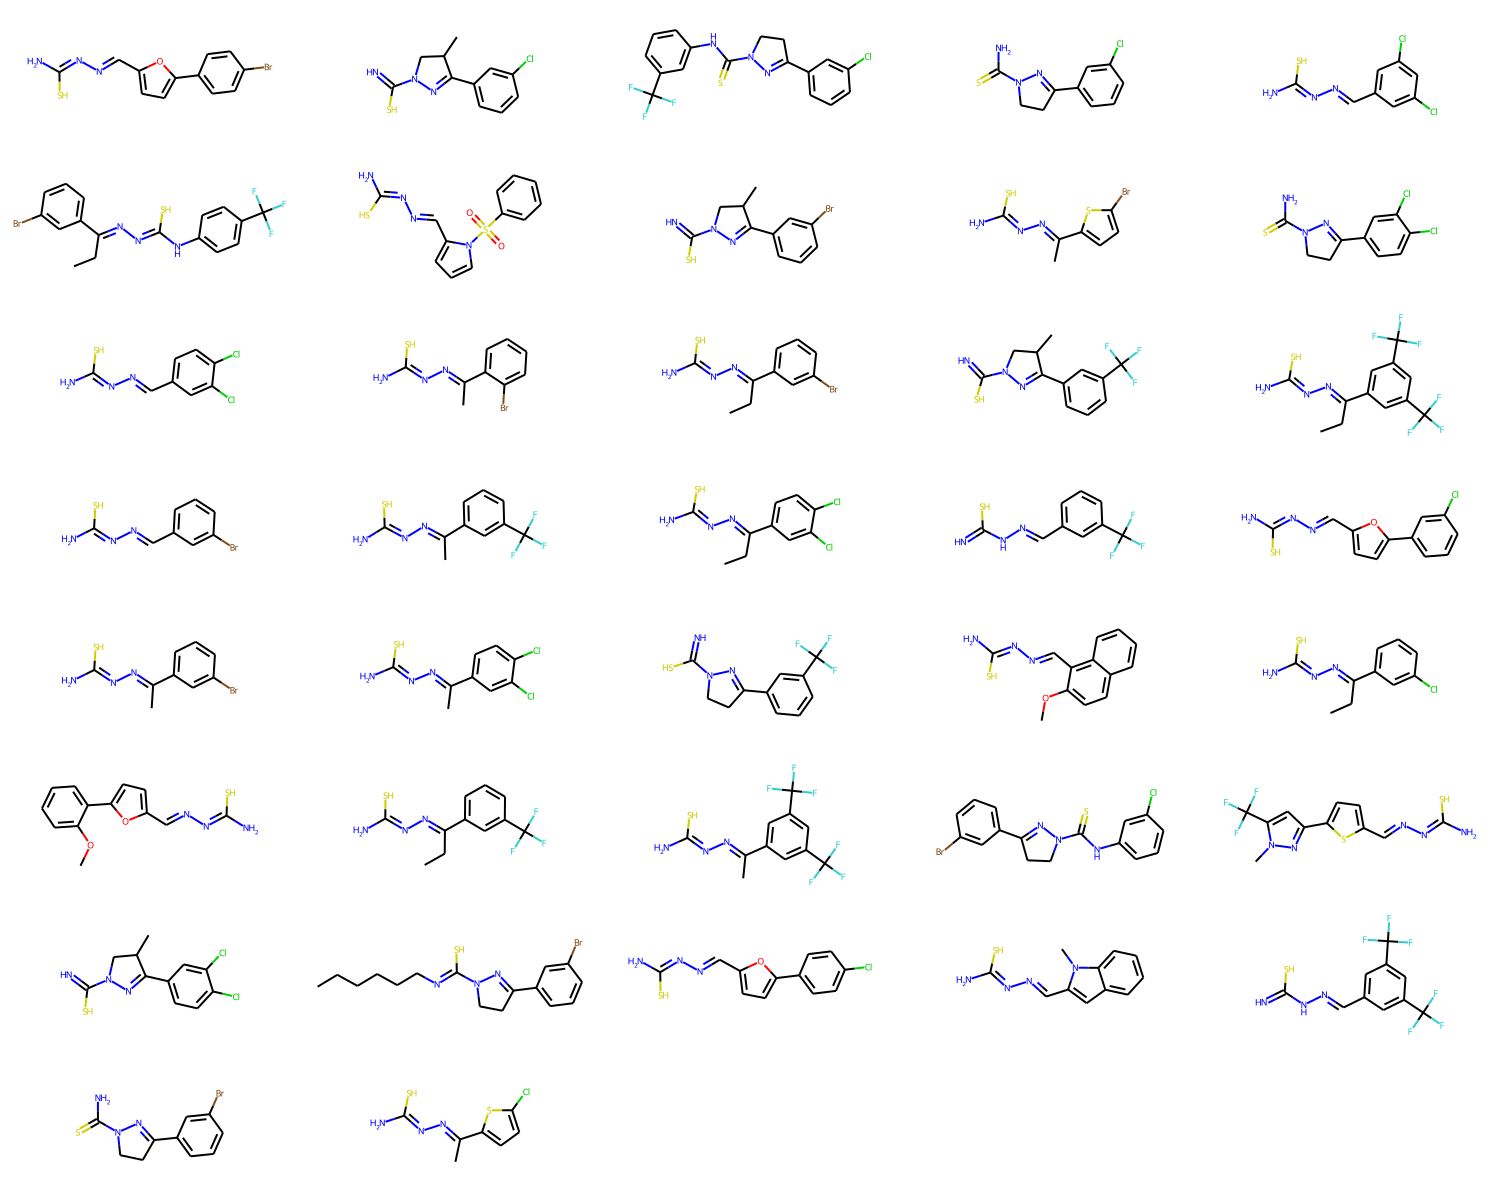

In [13]:
Draw.MolsToGridImage(df["rdkit_mol"], molsPerRow=5, subImgSize=(300, 150))

Todos os compostos da série contêm o grupo tiossemicarbazona.

Vamos calcular os valores de logP e identificar a tendência:

In [14]:
df["clogP"] = df["rdkit_mol"].apply(Descriptors.MolLogP)

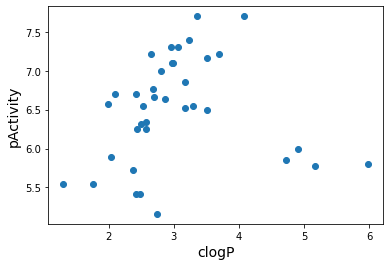

In [15]:
# Gráfico de dispersão
plt.scatter(df["clogP"], df["pChEMBL Value"])
plt.xlabel("clogP", fontsize=14)
plt.ylabel("pActivity", fontsize=14)
plt.show()

Veja que no lado direito da figura há quatro compostos que são *outliers*, porém, eles estão **abaixo** da linha de tendência dos outros compostos, o que significa que sua atividade está abaixo da esperada quando consideramos seus tamanhos. 

De fato, veja como todos eles apresentam $logP$ maior que 4.0, mas a mesma atividade de outros compostos com valores de $logP$ menores que 3.0.

Vamos identificar esses compostos "pouco eficientes":

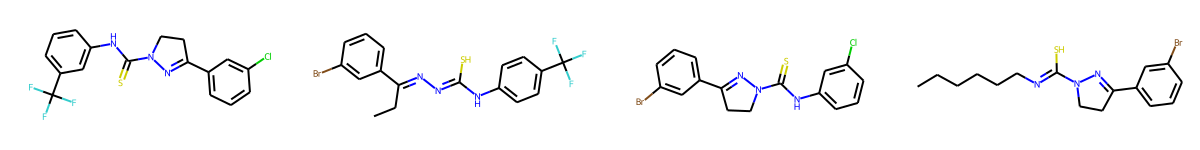

In [16]:
Draw.MolsToGridImage(df[df["clogP"] > 4.3]["rdkit_mol"], molsPerRow=4, subImgSize=(300, 150))

Vamos ver novamente a linha de tendência após remover esses compostos:

In [17]:
df = df[df["clogP"] < 4.3]

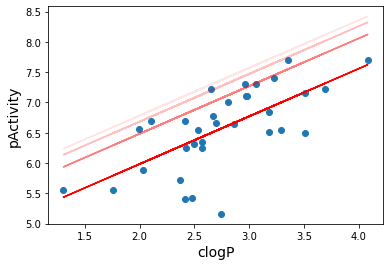

In [18]:
x = df["clogP"]
y = df["pChEMBL Value"]

# Ajustar uma regressão linear aos dados
model = LinearRegression()
model.fit(x.values.reshape(-1, 1), y.values.reshape(-1, 1))

# Gráfico de dispersão com linha de regressão
plt.plot(x, model.predict(x.values.reshape(-1, 1)), c='red')
plt.plot(x, model.predict(x.values.reshape(-1, 1)) + 0.5, c='red', alpha=0.5)
plt.plot(x, model.predict(x.values.reshape(-1, 1)) + 0.7, c='red', alpha=0.25)
plt.plot(x, model.predict(x.values.reshape(-1, 1)) + 0.8, c='red', alpha=0.1)
plt.scatter(x, y)
plt.xlabel("clogP", fontsize=14)
plt.ylabel("pActivity", fontsize=14)
plt.show()

Além da linha de tendência (em vermelho) também desenhei linhas paralelas acima para facilitar a identificação dos compostos "mais eficientes", ou seja, compostos da série que apresentam atividade mais alta do que outros análogos com valor similar de $logP$. 

Essas linhas não são nada mais do que linhas correspondentes a diferentes valores de $LLE/LipE$. Veja, por exemplo, [este gráfico da Wikipedia](https://en.wikipedia.org/wiki/Lipophilic_efficiency#/media/File:LiPE_Plot.png).

Podemos destacar, por exemplo, os compostos acima da linha +0,5. Vejamos quais são:

In [19]:
df_pred = model.predict(x.values.reshape(-1, 1))
df["predição"] = df_pred.reshape(-1)
df["diferença"] = df["pChEMBL Value"] - df["predição"]

In [20]:
df[df["pChEMBL Value"] > df_pred.reshape(-1) + 0.5][["clogP", "pChEMBL Value", "predição", "diferença"]]

,clogP,pChEMBL Value,predição,diferença
5,1.9934,6.57,5.978863,0.591137
17,2.6468,7.22,6.493139,0.726861
29,3.3520,7.70,7.048187,0.651813
40,2.9619,7.30,6.741148,0.558852
71,2.1025,6.70,6.064733,0.635267


Particularmente, o composto de índice **17** chama a atenção, por ser muito "eficiente", ou seja, está mais longe da linha de tendência (maior diferença entre o valor predito e o valor medido de atividade). 

Isso nos sugere que talvez seja uma boa ideia selecionar o composto 17 como líder (*lead compound*), uma vez que teremos mais liberdade para adicionar grupos funcionais e melhorar sua atividade, sem nos preocuparmos com o aumento do $logP$.

Contraste com o composto mais à direita do gráfico, que é também um dos mais potentes da série:

In [21]:
# Selecionando compostos com maior atividade - são dois
df[df["pChEMBL Value"] == df["pChEMBL Value"].max()][["clogP", "pChEMBL Value"]]

,clogP,pChEMBL Value
26,4.0828,7.7
29,3.3520,7.7


O composto a que nos referimos é o de índice **26** ($clogP$ = 4.08). 

Note que se usássemos esse composto como ponto de partida para otimização, seria mais difícil acrescentar grupos funcionais sem criar análogos excessivamente lipofílicos.

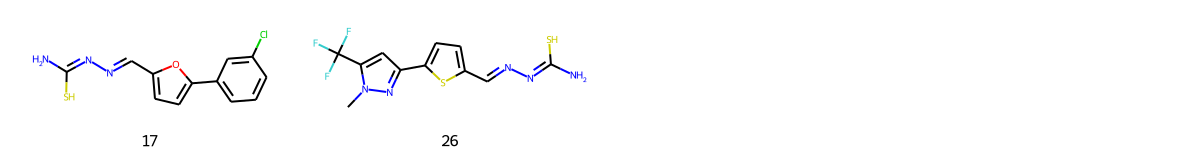

In [22]:
Draw.MolsToGridImage(df.iloc[[17,26]]["rdkit_mol"], molsPerRow=4, subImgSize=(300, 150), legends=['17','26'])

Vamos calcular, para os dois compostos, algumas das métricas de qualidade apresentadas, e verificar como eles são classificados:

In [23]:
df_metrics = pd.DataFrame(columns=['17','26'])
df_metrics['17'] = [ligand_efficiency(df.iloc[17]["Smiles"], df.iloc[17]["pChEMBL Value"]),
                    sile(df.iloc[17]["Smiles"], df.iloc[17]["pChEMBL Value"]),
                    bei(df.iloc[17]["Smiles"], df.iloc[17]["pChEMBL Value"]),
                    sei(df.iloc[17]["Smiles"], df.iloc[17]["pChEMBL Value"]),
                    lipe(df.iloc[17]["Smiles"], df.iloc[17]["pChEMBL Value"]),
                    lle_at(df.iloc[17]["Smiles"], df.iloc[17]["pChEMBL Value"]),
                    lelp(df.iloc[17]["Smiles"], df.iloc[17]["pChEMBL Value"])]
df_metrics['26'] = [ligand_efficiency(df.iloc[26]["Smiles"], df.iloc[26]["pChEMBL Value"]),
                    sile(df.iloc[26]["Smiles"], df.iloc[26]["pChEMBL Value"]),
                    bei(df.iloc[26]["Smiles"], df.iloc[26]["pChEMBL Value"]),
                    sei(df.iloc[26]["Smiles"], df.iloc[26]["pChEMBL Value"]),
                    lipe(df.iloc[26]["Smiles"], df.iloc[26]["pChEMBL Value"]),
                    lle_at(df.iloc[26]["Smiles"], df.iloc[26]["pChEMBL Value"]),
                    lelp(df.iloc[26]["Smiles"], df.iloc[26]["pChEMBL Value"])]
df_metrics.index = ["LE", "SILE", "BEI", "SEI", "LLE", "LLE_AT", "LELP"]
df_metrics.round(2)

,17,26
LE,0.52,0.34
SILE,2.88,2.07
BEI,24.49,15.48
SEI,10.72,7.53
LLE,3.67,2.41
LLE_AT,0.39,0.27
LELP,6.10,8.16


Nesse exemplo, com exceção da $LLE_{AT}$, as métricas apontam corretamente para o composto que identificamos como mais eficiente.

Veja, porém, que o cálculo da eficiência do ligante não identifica o composto 17 como um dos mais promissores, pois leva em consideração somente o número de átomos, e não a lipofilia:

In [24]:
df['LE'] = df.apply(lambda x: ligand_efficiency(x["Smiles"], x["pChEMBL Value"]), axis=1)
df['LipE'] = df.apply(lambda x: lipe(x["Smiles"], x["pChEMBL Value"]), axis=1)
df.sort_values(by="LE", ascending=False).head(10)[["LE", "LipE", "clogP", "pChEMBL Value"]]

,LE,LipE,clogP,pChEMBL Value
40,0.666733,4.3381,2.9619,7.30
29,0.659313,4.3480,3.3520,7.70
39,0.655643,4.2824,2.4176,6.70
24,0.639333,4.1923,2.8077,7.00
27,0.620715,3.8625,2.0275,5.89
21,0.620414,3.7682,2.5718,6.34
17,0.618213,4.5732,2.6468,7.22
71,0.611933,4.5975,2.1025,6.70
8,0.611607,3.6782,2.5718,6.25
46,0.608280,3.9614,2.6986,6.66


# Outras fontes consultadas

[Artigo de revisão, em inglês](https://pubs.acs.org/doi/pdf/10.1021/acs.chemrestox.6b00043), que discute diversas métricas de qualidade e cita os trabalhos em que foram propostas.

Também consultei um post no blog [Molecular Design](http://fbdd-lit.blogspot.com/2016/06/yet-more-on-ligand-efficiency-metrics.html), cujo autor publicou um artigo criticando o uso indiscriminado das métricas de qualidade: [Ligand efficiency metrics considered harmful](https://link.springer.com/article/10.1007/s10822-014-9757-8)

Veja também o *Notebook* [Regra dos Cinco e filtros em química medicinal](https://github.com/rflameiro/Python_e_Quiminformatica/blob/main/Quiminformatica/Regra%20dos%20Cinco%20e%20filtros%20em%20qu%C3%ADmica%20medicinal.ipynb)